<a href="https://colab.research.google.com/github/AadityaKhetan/VISION/blob/master/SGPCurrencyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile



In [2]:
Currencies = 'D:\Currencies.zip'
zip_ref = zipfile.ZipFile(Currencies, 'r')
zip_ref.extractall("D:")
zip_ref.close()
#!rm -rf '/tmp/Thai and Indian Currency Dataset256x256/Thai Currencies'
#!rm -rf '/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/2000/INDIA2000_16.jpg'


In [3]:
train_10_New = os.path.join('D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\10 New')
train_10_Old = os.path.join('D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\10 Old')
train_100_New = os.path.join('D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\100 New')
train_100_Old = os.path.join('D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\100 Old')
train_20 = os.path.join('D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\20')
train_200 = os.path.join('D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\200')
train_2000 = os.path.join('D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\2000')
train_50_New = os.path.join('D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\50 New')
train_50_Old = os.path.join('D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\50 Old')
train_500 = os.path.join('D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\500')

In [4]:
print('total training images of 10 New: ', len(os.listdir(train_10_New)))
print('total training images of 10 Old: ', len(os.listdir(train_10_Old)))
print('total training images of 100 New:', len(os.listdir(train_100_New)))
print('total training images of 100 Old:', len(os.listdir(train_100_Old)))
print('total training images of 20:     ', len(os.listdir(train_20)))
print('total training images of 200:    ', len(os.listdir(train_200)))
print('total training images of 2000:   ', len(os.listdir(train_2000)))
print('total training images of 50 New: ', len(os.listdir(train_50_New)))
print('total training images of 50 Old: ', len(os.listdir(train_50_Old)))
print('total training images of 500:    ', len(os.listdir(train_500)))

total training images of 10 New:  250
total training images of 10 Old:  190
total training images of 100 New: 190
total training images of 100 Old: 190
total training images of 20:      190
total training images of 200:     190
total training images of 2000:    190
total training images of 50 New:  190
total training images of 50 Old:  190
total training images of 500:     190


In [5]:
to_create = [
    'D:\\indiancurrency',
    'D:\\indiancurrency\\training',
    'D:\\indiancurrency\\testing',
    'D:\\indiancurrency\\training\\10New',
    'D:\\indiancurrency\\testing\\10New',
    'D:\\indiancurrency\\training\\10Old',
    'D:\\indiancurrency\\testing\\10Old',
    'D:\\indiancurrency\\training\\100New',
    'D:\\indiancurrency\\testing\\100New',
    'D:\\indiancurrency\\training\\100Old',
    'D:\\indiancurrency\\testing\\100Old',
    'D:\\indiancurrency\\training\\20',
    'D:\\indiancurrency\\testing\\20',
    'D:\\indiancurrency\\training\\200',
    'D:\\indiancurrency\\testing\\200',
    'D:\\indiancurrency\\training\\2000',
    'D:\\indiancurrency\\testing\\2000',
    'D:\\indiancurrency\\training\\50New',
    'D:\\indiancurrency\\testing\\50New',
    'D:\\indiancurrency\\training\\50Old',
    'D:\\indiancurrency\\testing\\50Old',
    'D:\\indiancurrency\\training\\500',
    'D:\\indiancurrency\\testing\\500'
]

for directory in to_create:
    try:
        os.mkdir(directory)
        print(directory, 'created')
    except:
        print(directory, 'failed')

D:\indiancurrency created
D:\indiancurrency\training created
D:\indiancurrency\testing created
D:\indiancurrency\training\10New created
D:\indiancurrency\testing\10New created
D:\indiancurrency\training\10Old created
D:\indiancurrency\testing\10Old created
D:\indiancurrency\training\100New created
D:\indiancurrency\testing\100New created
D:\indiancurrency\training\100Old created
D:\indiancurrency\testing\100Old created
D:\indiancurrency\training\20 created
D:\indiancurrency\testing\20 created
D:\indiancurrency\training\200 created
D:\indiancurrency\testing\200 created
D:\indiancurrency\training\2000 created
D:\indiancurrency\testing\2000 created
D:\indiancurrency\training\50New created
D:\indiancurrency\testing\50New created
D:\indiancurrency\training\50Old created
D:\indiancurrency\testing\50Old created
D:\indiancurrency\training\500 created
D:\indiancurrency\testing\500 created


In [21]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    all_files = []
    
    for file_name in os.listdir(SOURCE):
        file_path = os.path.join(SOURCE,file_name)

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    n_files = len(all_files)
    split_point = int(n_files * SPLIT_SIZE)
    
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    
    for file_name in train_set:
        copyfile(os.path.join(SOURCE,file_name), os.path.join(TRAINING,file_name))
        
    for file_name in test_set:
        copyfile(os.path.join(SOURCE,file_name), os.path.join(TESTING,file_name))

split_size = .9

NEW10_SOURCE_DIR = r"D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\10 New"
TRAINING_NEW10_DIR = r"D:\\indiancurrency\\training\\10New"
TESTING_NEW10_DIR = r"D:\\indiancurrency\\testing\\10New"

split_data(NEW10_SOURCE_DIR, TRAINING_NEW10_DIR, TESTING_NEW10_DIR, split_size)

Old10_SOURCE_DIR = r"D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\10 Old"
TRAINING_OLD10_DIR = r"D:\\indiancurrency\\training\\10Old"
TESTING_OLD10_DIR = r"D:\\indiancurrency\\testing\\10Old"

split_data(Old10_SOURCE_DIR, TRAINING_OLD10_DIR, TESTING_OLD10_DIR, split_size)

NEW100_SOURCE_DIR = r"D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\100 New"
TRAINING_NEW100_DIR = r"D:\\indiancurrency\\training\\100New"
TESTING_NEW100_DIR = r"D:\\indiancurrency\\testing\\100New"

#Continue from here

split_data(NEW100_SOURCE_DIR, TRAINING_NEW100_DIR, TESTING_NEW100_DIR, split_size)

OLD100_SOURCE_DIR = r"D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\100 Old"
TRAINING_OLD100_DIR = r"D:\\indiancurrency\\training\\100Old"
TESTING_OLD100_DIR = r"D:\\indiancurrency\\testing\\100Old"

split_data(OLD100_SOURCE_DIR, TRAINING_OLD100_DIR, TESTING_OLD100_DIR, split_size)

NEW20_SOURCE_DIR = r"D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\20"
TRAINING_NEW20_DIR = r"D:\\indiancurrency\\training\\20"
TESTING_NEW20_DIR = r"D:\\indiancurrency\\testing\\20"

split_data(NEW20_SOURCE_DIR, TRAINING_NEW20_DIR, TESTING_NEW20_DIR, split_size)

NEW200_SOURCE_DIR = r"D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\200"
TRAINING_NEW200_DIR = r"D:\\indiancurrency\\training\\200"
TESTING_NEW200_DIR = r"D:\\indiancurrency\\testing\\200"

split_data(NEW200_SOURCE_DIR, TRAINING_NEW200_DIR, TESTING_NEW200_DIR, split_size)

NEW2000_SOURCE_DIR = r"D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\2000"
TRAINING_NEW2000_DIR = r"D:\\indiancurrency\\training\\2000"
TESTING_NEW2000_DIR = r"D:\\indiancurrency\\testing\\2000"

split_data(NEW2000_SOURCE_DIR, TRAINING_NEW2000_DIR, TESTING_NEW2000_DIR, split_size)

NEW50_SOURCE_DIR = r"D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\50 New"
TRAINING_NEW50_DIR = r"D:\\indiancurrency\\training\\50New"
TESTING_NEW50_DIR = r"D:\\indiancurrency\\testing\\50New"

split_data(NEW50_SOURCE_DIR, TRAINING_NEW50_DIR, TESTING_NEW50_DIR, split_size)

OLD50_SOURCE_DIR = r"D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\50 Old"
TRAINING_OLD50_DIR = r"D:\\indiancurrency\\training\\50Old"
TESTING_OLD50_DIR = r"D:\\indiancurrency\\testing\\50Old"

split_data(OLD50_SOURCE_DIR, TRAINING_OLD50_DIR, TESTING_OLD50_DIR, split_size)

NEW500_SOURCE_DIR = r"D:\\Thai and Indian Currency Dataset256x256\\Indian Currencies\\500"
TRAINING_NEW500_DIR = r"D:\\indiancurrency\\training\\500"
TESTING_NEW500_DIR = r"D:\\indiancurrency\\testing\\500"

split_data(NEW500_SOURCE_DIR, TRAINING_NEW500_DIR, TESTING_NEW500_DIR, split_size)

print(len(os.listdir(TRAINING_NEW10_DIR)))
print(len(os.listdir(TESTING_NEW10_DIR)))

print(len(os.listdir(TRAINING_OLD10_DIR)))
print(len(os.listdir(TESTING_OLD10_DIR)))

print(len(os.listdir(TRAINING_NEW100_DIR)))
print(len(os.listdir(TESTING_NEW100_DIR)))

print(len(os.listdir(TRAINING_OLD100_DIR)))
print(len(os.listdir(TESTING_OLD100_DIR)))

print(len(os.listdir(TRAINING_NEW20_DIR)))
print(len(os.listdir(TESTING_NEW20_DIR)))

print(len(os.listdir(TRAINING_NEW200_DIR)))
print(len(os.listdir(TESTING_NEW200_DIR)))

print(len(os.listdir(TRAINING_NEW2000_DIR)))
print(len(os.listdir(TESTING_NEW2000_DIR)))

print(len(os.listdir(TRAINING_NEW50_DIR)))
print(len(os.listdir(TESTING_NEW50_DIR)))

print(len(os.listdir(TRAINING_OLD50_DIR)))
print(len(os.listdir(TESTING_OLD50_DIR)))

print(len(os.listdir(TRAINING_NEW500_DIR)))
print(len(os.listdir(TESTING_NEW500_DIR)))




225
25
171
19
171
19
171
19
171
19
171
19
171
19
171
19
171
19
171
19


In [29]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.65):
      print("\nReached 70% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model = tf.keras.models.Sequential([

    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 32)      

In [31]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=90,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [33]:
TRAINING_DIR = 'D:\\indiancurrency\\training'
#train_datagen = ImageDataGenerator(rescale= 1/255)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=32,
    class_mode='categorical',
    target_size=(256, 256)
)

VALIDATION_DIR = 'D:\\indiancurrency\\testing'
validation_datagen = ImageDataGenerator(rescale= 1/255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=32,
    class_mode='categorical',
    target_size=(256, 256)
)

Found 1763 images belonging to 10 classes.
Found 196 images belonging to 10 classes.


In [34]:
history = model.fit(
      train_generator,
      epochs=15,  
      verbose=1,
      validation_data=validation_generator,
      callbacks=[callbacks])

Epoch 1/15
56/56 [==============================] - 90s 2s/step - loss: 2.5215 - accuracy: 0.1202 - val_loss: 2.2151 - val_accuracy: 0.2296
Epoch 2/15
56/56 [==============================] - 96s 2s/step - loss: 2.2190 - accuracy: 0.1980 - val_loss: 2.1927 - val_accuracy: 0.2041
Epoch 3/15
56/56 [==============================] - 99s 2s/step - loss: 2.1498 - accuracy: 0.2138 - val_loss: 2.1167 - val_accuracy: 0.1582
Epoch 4/15
56/56 [==============================] - 97s 2s/step - loss: 2.0209 - accuracy: 0.2655 - val_loss: 1.7283 - val_accuracy: 0.3163
Epoch 5/15
56/56 [==============================] - 92s 2s/step - loss: 1.8801 - accuracy: 0.3199 - val_loss: 1.5079 - val_accuracy: 0.3776
Epoch 6/15
56/56 [==============================] - 91s 2s/step - loss: 1.7499 - accuracy: 0.3375 - val_loss: 2.2156 - val_accuracy: 0.2143
Epoch 7/15
56/56 [==============================] - 89s 2s/step - loss: 1.7439 - accuracy: 0.3619 - val_loss: 1.7250 - val_accuracy: 0.3316
Epoch 8/15
56/56 [==

Plotting loss and accuracy.

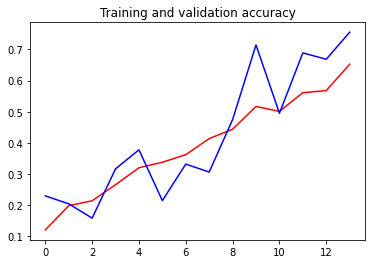

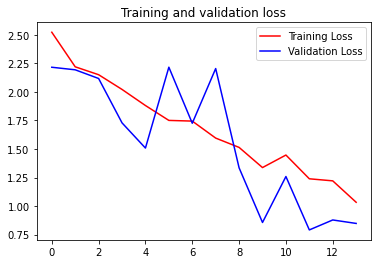

In [35]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Predicting with new images.

In [36]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])

  #predictions = model.predict(images,batch_size=32)
  #class_names = ['10RsNote', '10RsNote', '100RsNote', '100RsNote','20RsNote','200RsNote', '2000RsNote','50RsNote','50RsNote','500RsNote']
  #print(model.predict_classes())
  print(np.argmax(model.predict(images), axis=-1))

ModuleNotFoundError: No module named 'google.colab'

Export the model


In [37]:
INDIAN_CURRENCY_SAVED_MODEL = "exp_saved_model"
tf.saved_model.save(model, INDIAN_CURRENCY_SAVED_MODEL)
loaded = tf.saved_model.load(INDIAN_CURRENCY_SAVED_MODEL)
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

INFO:tensorflow:Assets written to: exp_saved_model\assets


INFO:tensorflow:Assets written to: exp_saved_model\assets


['serving_default']
((), {'conv2d_9_input': TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='conv2d_9_input')})
{'dense_7': TensorSpec(shape=(None, 10), dtype=tf.float32, name='dense_7')}


Convert using TFLite's converter

In [41]:
converter = tf.lite.TFLiteConverter.from_saved_model(INDIAN_CURRENCY_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

CREATING LABEL.TXT

In [42]:
labels = ['10 Rupees', 'Rupees 10','100 Rupees','Rupees 100','20 Rupees','200 Rupees','2000 Rupees','50 Rupees','Rupees 50','500 Rupees']

with open('labels.txt', 'w') as f:
    f.write('\n'.join(labels))

Downloading files

In [44]:

try:
    #from google.colab import files
    #files.download('converted_model.tflite')
    #files.download('labels.txt')
    open("currency.tflite","wb").write(converted_model.tflite)
    open(labels.txt)
except:
    pass